# <center> Homework 3 </center>
## <center> Kishore Narendran | 14644574 | narendrk@uci.edu</center>

### Problem 1 - Perceptrons and Linear Regression

##### a) Show the two classes in a Scatter Plot to exhibit linear seperability.

/Users/kishorenarendran/Code/Github/kishore-narendran/CS273A-MachineLearning/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


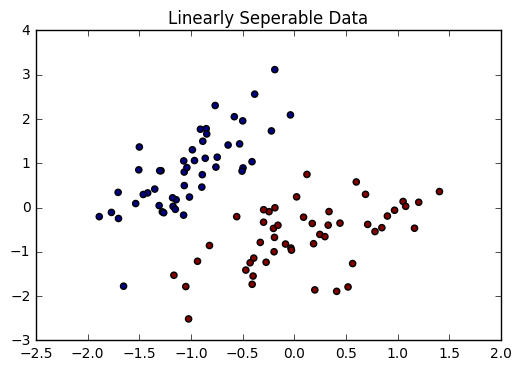

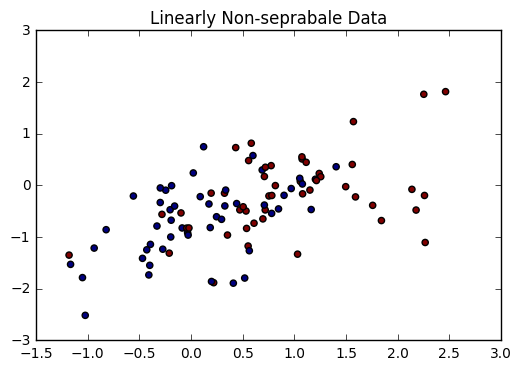

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.logistic2 as lc2
import warnings
warnings.filterwarnings('ignore')

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]                  # get first two features & target
X, Y = ml.shuffleData(X, Y)                     # reorder randomly (important later)
X, params = ml.rescale(X)                       # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2]                       # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]                       # get class 1 vs 2

# (a) Scatter plot of the two classes to exhibit seperability
plt.title('Linearly Seperable Data')
plt.scatter(XA[:, 0], XA[:, 1], c = YA)
plt.show()

plt.title('Linearly Non-seprabale Data')
plt.scatter(XB[:, 0], XB[:, 1], c = YB)
plt.show()

##### b) Plotting the decision boundary along with the class data points

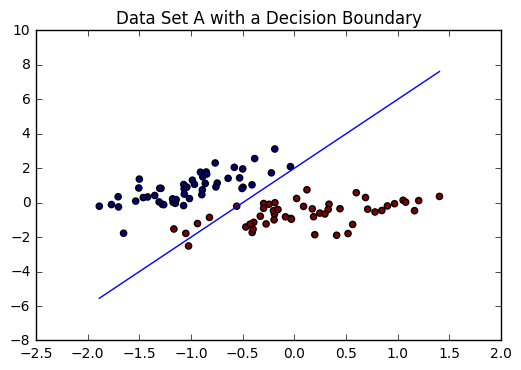

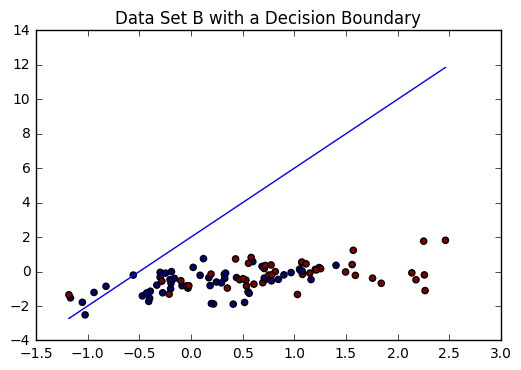

In [2]:
# (b) Plotting a boundary with the class data points, by modifying plotBoundary()
learner = lc2.logisticClassify2()               # Initializing the logisic classifier
learner.classes = np.unique(YA)                 # Picking uniqe values as the class labels
wts = np.zeros(shape=(1,3))
wts[0,:] = [0.5, 1, -0.25]                           # Assigning weights
learner.theta=wts
plt.title('Data Set A with a Decision Boundary')
learner.plotBoundary(XA, YA)                    # Plotting decision boundary

# Performing above actions for the XB-YB split of the data
learner = lc2.logisticClassify2()
learner.classes = np.unique(YA)
learner.theta=wts
plt.title('Data Set B with a Decision Boundary')
learner.plotBoundary(XB, YB)

##### c) Performing prediction with the current theta values, and calculating the training data error

In [3]:
# (c) Performing prediction and finding the training data error rate
learner.classes = np.unique(YA)
YPred = learner.predict(XA)
trainingErrorRate = np.sum((YPred - YA) ** 2)/YPred.shape[0]
print "Training Data Error Rate on Data Set A\t=\t", trainingErrorRate
learner.classes = np.unique(YB)
YPred = learner.predict(XB)
trainingErrorRate = np.sum((YPred - YB) ** 2)/YPred.shape[0]
print "Training Data Error Rate on Data Set B\t=\t", trainingErrorRate

Training Data Error Rate on Data Set A	=	0.0505050505051
Training Data Error Rate on Data Set B	=	0.464646464646


##### d) Boundary plot on the predict function

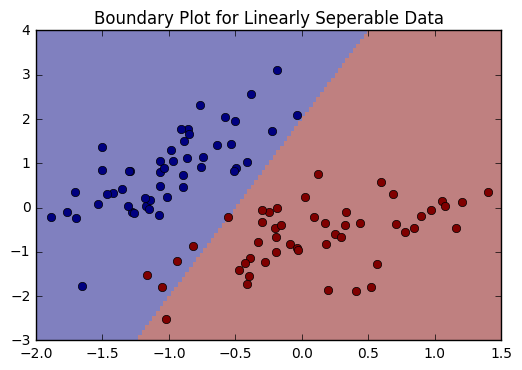

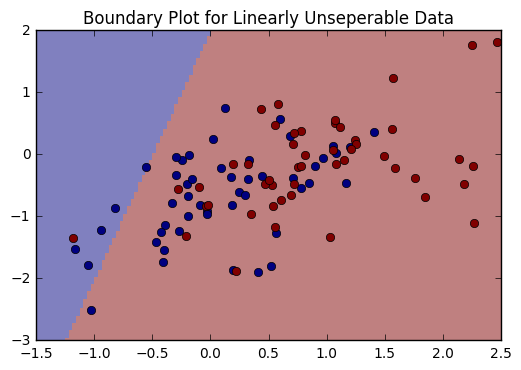

In [4]:
ml.plotClassify2D(learner, XA, YA)
plt.title('Boundary Plot for Linearly Seperable Data')
plt.show()
ml.plotClassify2D(learner, XB, YB)
plt.title('Boundary Plot for Linearly Unseperable Data')
plt.show()

##### e) Deriving the gradient of the negative log likelihood for logistic regression
Please find the derivation in a PDF attached with this document.

##### f) Complete the training function 

```
    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopIter=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        ## First do some bookkeeping and setup:
        self.theta,X,Y = twod(self.theta), arr(X), arr(Y)   # convert to numpy arrays
        M,N = X.shape
        if Y.shape[0] != M:
            raise ValueError("Y must have the same number of data (rows) as X")
        self.classes = np.unique(Y)
        if len(self.classes) != 2:
            raise ValueError("Y should have exactly two classes (binary problem expected)")
        if self.theta.shape[1] != N+1:         # if self.theta is empty, initialize it!
            self.theta = np.random.randn(1,N+1)
        # Some useful modifications of the data matrices:
        X1  = np.hstack((np.ones((M,1)),X))    # make data array with constant feature
        Y01 = toIndex(Y, self.classes)         # convert Y to canonical "0 vs 1" classes

        it   = 0
        done = False
        Jsur = []
        J01  = []
        while not done:
            step = (2.0 * initStep) / (2.0 + it)   # common 1/iter step size change
            si = []
            for i in range(M):  # for each data point i:
                ## Computing the linear response
                zi = X1[i, :].dot(self.theta.T)
                ## Computing the prediction yi
                yi = Y01[i]
                ## Computing soft response
                si.append(self.logistic(zi))
                ## Computing gradient of logistic loss
                gradi = (si[i] - yi) * X1[i, :]
                # Take a step down the gradient
                self.theta = self.theta - step * gradi

            # each pass, compute surrogate loss & error rates:
            J01.append( self.err(X,Y) )
            ## Computing surrogate loss
            sum_i = 0
            for i in range(M):
                sum_i += Y01[i] * si[i] * np.log(si[i]) + (1 - Y01[i]) * (1 - si[i]) * np.log(1 - si[i])
            Jsur.append( sum_i / M ) ## TODO ...

            ## For debugging: print current parameters & losses
            # print self.theta, ' => ', Jsur[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # check stopping criteria:
            it += 1
            done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
        self.numberOfIterations = it
        plt.semilogx(range(it), np.abs(Jsur))
        plt.semilogx(range(it), np.abs(J01))
        plt.show()
 ```

##### g) Logistic regression on both data sets with different parameter choices

ITERATIONS =  33


ValueError: cannot convert float NaN to integer

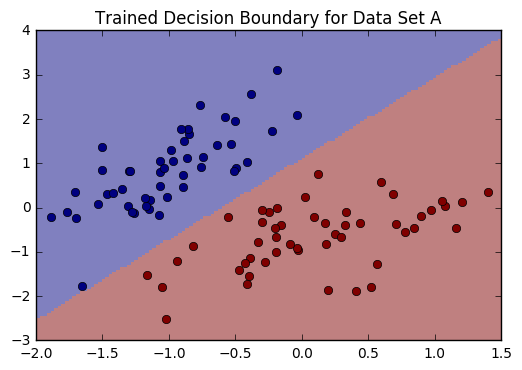

In [6]:
# (f) Training logistic regression classifier with Data Set A
learner = lc2.logisticClassify2()
XA, YA = ml.shuffleData(XA, YA)
plt.title('Convergence of Surrogate Loss and Error Rate for Data Set A')
learner.plotFlag = True
learner.train(XA,YA)
ml.plotClassify2D(learner, XA, YA)
plt.title('Trained Decision Boundary for Data Set A')
plt.show()

ITERATIONS =  24


ValueError: cannot convert float NaN to integer

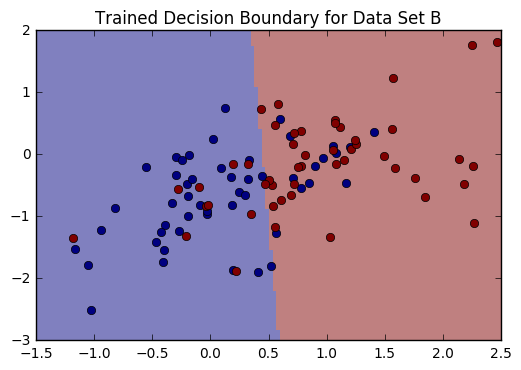

In [7]:
# Training logistic regression classifier with Data Set B
learner = lc2.logisticClassify2()
XB, YB = ml.shuffleData(XB, YB)
plt.title('Convergence of Surrogate Loss and Error Rate for Data Set B')
learner.plotFlag = True
learner.train(XB,YB)
ml.plotClassify2D(learner, XB, YB)
plt.title('Trained Decision Boundary for Data Set B')
plt.show()

In [8]:
# Tetsing different step sizes to check iterations required for convergence
xs = []
iterations = []
for i in np.arange(0.1, 6, 0.25):
    learner = lc2.logisticClassify2()
    XA, YA = ml.shuffleData(XA, YA)
    learner.plotFlag = False
    xs.append(i)
    learner.train(XA, YA, initStep=i)
    iterations.append(learner.numberOfIterations)

plt.plot(xs, iterations)
plt.title('Number of Iterations vs Step Size')
plt.show()

ITERATIONS =  62


ValueError: cannot convert float NaN to integer

ITERATIONS =  45


ValueError: cannot convert float NaN to integer

ITERATIONS =  38


ValueError: cannot convert float NaN to integer

ITERATIONS =  34


ValueError: cannot convert float NaN to integer

ITERATIONS =  30


ValueError: cannot convert float NaN to integer

ITERATIONS =  29


ValueError: cannot convert float NaN to integer

ITERATIONS =  26


ValueError: cannot convert float NaN to integer

ITERATIONS =  27


ValueError: cannot convert float NaN to integer

ITERATIONS =  23


ValueError: cannot convert float NaN to integer

ITERATIONS =  22


ValueError: cannot convert float NaN to integer

ITERATIONS =  19


ValueError: cannot convert float NaN to integer

ITERATIONS =  19


ValueError: cannot convert float NaN to integer

ITERATIONS =  19


ValueError: cannot convert float NaN to integer

ITERATIONS =  17


ValueError: cannot convert float NaN to integer

ITERATIONS =  15


ValueError: cannot convert float NaN to integer

ITERATIONS =  11


ValueError: cannot convert float NaN to integer

ITERATIONS =  11


ValueError: cannot convert float NaN to integer

ITERATIONS =  13


ValueError: cannot convert float NaN to integer

ITERATIONS =  9


ValueError: cannot convert float NaN to integer

ITERATIONS =  16


ValueError: cannot convert float NaN to integer

ITERATIONS =  5001


ValueError: Data has no positive values, and therefore can not be log-scaled.

The initStep parameter which is the step size in the train function dictates the number of iterations required to converge at the minima. By decreasing the initStep parameter, the number of iterations required for comvergence increases and vice versa. However, when increasing the initStep to a very high number, sometimes convergence may not be reached, because it always skips past the minima. In this particulr scenario for the seperable data set A, the optimum step size seems to fall somewhere in between 5 and 6.

### Problem 2 - Shattering and VC Dimension

##### a) Which of the following examples can be shattered by each learner?

The first two examples are the examples that can be shattered by all three functions.

##### b) What example can each of the learners shatter? What is the VC dimension of each of these learners?

The first learner is a line parallel to the y-axis. Such a line can shatter example (b) with two points. Any labeling of the points in arrangement (b) can be shattered hence its VC dimension is 2.
The second learner is a circle whose center can be at any point (a,b). Such a learner can shatter example (c) with three points. Any labeling of the points in arrangement (c) can be shattered hence its VC dimension is 3.
The third learner is a line going through the origin. Such a line can shatter example (b) with two points. Any labeling of the points in arrangement (b) can be shattered hence its VC dimension is 2.